### Overview
Copy the code from [Medium](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6).

In [2]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:    
    
    def __init__(self, x, y):
        
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(y.shape)
    
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [3]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])
nn = NeuralNetwork(X,y)

for i in range(1500):
    nn.feedforward()
    nn.backprop()

print(nn.output)

[[0.01875185]
 [0.98102158]
 [0.97714535]
 [0.02271424]]


### Details
The neural network above has 2 fully connected layers, with sigmoid activations. For simplicity the biases of the fully connected layers were set to 0.

#### Fully Connected Layer
A fully connected layer is simply the following function, where $n,m \in \mathbb{N}$ are positive integers.

$$ f_{W,b} (x) = Wx + b, \quad x \in \mathbb{R}^n, W \in \mathbb{R^{m\times n}}, b \in \mathbb{R}^m. $$

This is the general form of an affine linear transform of $x$ from an $n$-dimensional vector space to an $m$-dimensional vector space. It is said to be fully connected because each element of the output depends of every element of the input, that is if $y = f_{W,b} (x)$ then in Einstein notation

$$ y_i = W_{ij} x_j + b_i $$

which implies

$$ \frac{\partial y_i}{\partial x_j} = W_{ij}, \quad \text{for all } i= 1, \ldots, m, \, j = 1, \ldots, n. $$

In particular $y_i$ is dependent on $x_j$ for each $i$ and $j$, unless $W_{ij} = 0$.

#### Sigmoid Activation
Activation functions are typically mappings $g:\mathbb{R}^m \rightarrow \mathbb{R}^m$, that act as filters on the input values, for example by bounding the output values into a finte range. 


The sigmoid function here is defined by

$\sigma(x) = \frac{1}{1+e^{-x}}$.

Since $e^{-x} > 0$, this implies $\sigma(x) < 1$, and $\sigma(x)>0$ is clear. As such, a sigmoid activation bounds values to the range $(0,1)$.

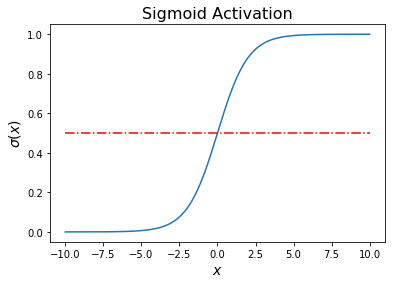

In [20]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,500)
y = 1.0/(1.0+np.exp(-x))

plt.xlabel('$x$',fontsize=14)
plt.ylabel('$\sigma(x)$',fontsize=14)
plt.plot(x,y)
plt.plot(x,0.5*np.ones((500,1)),'r-.')
plt.title('Sigmoid Activation', fontsize=16)
plt.show()

#### Neural Network

##### Forward
At the most abstract level, a forward pass of a neural network is simply a sequence of functions, $f_1, \ldots, f_\lambda$, such that

$$ \hat{y} = f_\lambda \circ f_{\lambda-1} \circ \ldots \circ f_1 (x). $$

Here $\hat{y}$ denotes an "approximator" to $y$, since $y$ will typically denote the "true value" the network is trying to predict.

For each $f_i$ there may be associated parameters $\omega_{i_j}$. For example the fully connected layer $f_{W,b} = Wx + b$ had parameters $W$ and $b$. In this case these parameters are called the weights and bias respectively.

The aim of "training" a neural network is to tune such parameters so that $\hat{y}$ is a good approximation to $y$. A good approximation is quantified by a loss function.

##### Loss Function

The simplest loss function is the mean square error. Given a set of true values $\{ y_i \}_{i=1 ^N}$ and a set of approximations $\{ \hat{y}_i \}_{i= 1^N}$ the mean square error is simply

$$ L(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|^2 . $$

When $\hat{y}$ is the output of a neural network, there are hidden parameters $\omega_1, \ldots, \omega_P$ such that

$$ \hat{y}_i = \hat{y}_i (\omega_1, \ldots, \omega_P). $$

As such we can reinterpret the loss function in terms of these parameters

$$ \widetilde{L} (y, \omega_1, \ldots, \omega_P) = L(y,\hat{y})$$.

The goal is then to minimise $\widetilde{L}$ with respect to $\omega_1, \ldots, \omega_P$, as these are simply model parameters which we are free to choose.

Calculus shows that if $\widetilde{L}$ is not minimised for some choice of $\omega_1, \ldots, \omega_P$, then the best update for these parameters to minimize $\widetilde{L}$ is to use gradient descent

$$ \omega_i \rightarrow \omega_i - \frac{\partial \widetilde{L}}{\partial \omega_i} $$

This can overshoot the desired update, so an additional parameter is added, the learning rate $\gamma>0$ so that

$$ \omega_i \rightarrow \omega_i - \gamma \frac{\partial \widetilde{L}}{\partial \omega_i}. $$

In fact, the learning rate can be chosen more specifically, for example it could depend on the number of updates (iterations) that have occured.

###### Chain Rule

Recall that in a neural network

$$ \hat{y} = f_\lambda \circ f_{\lambda-1} \circ \ldots f_1 (x). $$

Let $\omega_{i,j}$ denote the parameters of $f_{j}$, that is $f_j$ has parameters $\omega_{1,j}, \omega_{2,j}, \ldots, \omega_{P_j, j}$.

When there are many layers, $\lambda$ is large, it would be difficult to compute the partial derivatives

$$ \frac{\partial \widetilde{L}}{\partial \omega_{i,j}} $$ 

for most layers, besides the final layer $j=\lambda$. The chain rule helps make this computation simpler, since $\hat{y}$ is simply a sequence of compositions. The following holds. Let $g_{k}$ denote the following

$$ g_k = f_k \circ f_{k-1} \circ \ldots f_1 . $$

Then

$$ \widetilde{L}(y, \omega_{i,j}) = L(y, \hat{y}) = L(y, f_\lambda(g_{\lambda-1} (x)) $$

Then 

$$ \frac{\partial \widetilde{L}}{\partial \omega_{i,j}} = \frac{\partial L}{\partial \hat{y}} \frac{\partial f_\lambda \circ g_{\lambda-1}}{\partial \omega_{i,j}}. $$

By the chain rule, if $j < \lambda$ we have that

$$ \frac{ \partial \widetilde{L}}{\partial \omega_{i,j}} = D_{\hat{y}} L Df_{\lambda} \frac{\partial g_{\lambda -1}}{\partial \omega_{i,j}}. $$

By induction it follows that

$$ \frac{\partial \widetilde{L}}{\partial \omega_{i,j}} = D_{\hat{y}} L \Pi_{k=\lambda} ^{j} Df_{k}  \frac{\partial f_j}{\partial \omega_{i,j}}. $$

The point of this is that you simply need the derivatives of each $f_j$ with respect to its parameters and inputs to compute the derivative of the loss with respect to the parameters.

As such the computation is well suited for looping over. This is called backpropagation. 

##### Backpropagation

Backpropagation is the way the parameters in a neural network are updated. After comparing the predictions $\hat{y}_1, \ldots, \hat{y}_N$ to the true values $y_1, \ldots, y_N$ via a loss function $L(y, \hat{y})$, the gradients of $L$ with respect to the parameters of the network are computed by "backpropagating" derivatives of the layers in the network.

By computing the derivatives of $L$ with respect to the parameters in the last layer, it becomes an inductive exercise to compute the necessary derivatives for all other parameters. At the end of this induction, the parameters can be updated. The key thing is that each layer must know it's derivatives of outputs with respect to inputs, where inputs here includes the parameters for that layer.

For a fully connected layer this is easy:

$$ y = f_{W,b} (x) \Rightarrow y_i = W_{ij} x_j + b_i. $$

As such

$$ \frac{\partial y_i}{\partial x_j} = W_{ij}, \quad \frac{\partial y_i}{\partial W_{jk}} = \delta_{ij} x_k, \quad \frac{\partial y_i}{\partial b_j} = \delta_{ij}. $$